# Decision Tree Lab

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
from numpy import ndarray
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from tabulate import tabulate
from typing import Tuple, List, Set
from collections import defaultdict
import math
import random

In [4]:
IRIS_SETOSA = 0
IRIS_VERSICOLOR = 1
IRIS_VIRGINICA = 2
FALSE, TRUE = 0, 1

DEMOCRAT = 0
REPUBLICAN = 1
UNKNOWN = -1

UNACC = 0
ACC = 1
GOOD = 2
VGOOD = 3

SMALL = 0
LOW = 0
MED = 1
TWO = 2
BIG = 2
HIGH = 2
THREE = 3
VHIGH = 3
FOUR = 4
FIVEMORE = 5
MORE = 5

np.set_printoptions(threshold=1000000)


def load_iris() -> Tuple[ndarray, ndarray]:
  """
  Purpose: Classification between 3 types of iris flowers

  Features:
    sepallength	(REAL)
    sepalwidth (REAL)
    petallength (REAL)
    petalwidth (REAL)

  Classifications:
    -> {Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2 }
  """
  data_arff = arff.loadarff("iris.arff")
  data_df = pd.DataFrame(data_arff[0])
  data_np = data_df.to_numpy()
  X = data_np[:, :-1]
  y = data_np[:, -1]

  # # categorical -> indicator variables (create boolean for each possible option)
  # indicator_vars = pd.get_dummies(data_df['class']).to_numpy().astype(int)
  # y = indicator_vars

  # convert strings/booleans to numbers
  X = X.astype(float)
  y = np.where(y == b'Iris-setosa', IRIS_SETOSA, y)
  y = np.where(y == b'Iris-versicolor', IRIS_VERSICOLOR, y)
  y = np.where(y == b'Iris-virginica', IRIS_VIRGINICA, y)
  y = np.array(y, dtype=int)

  return X, y

def load_voting_with_missing(use_one_hot_X=True):
  """
  Purpose: Classification between Democrat and Republican

  Features:
    handicapped-infants: (y,n)
    water-project-cost-sharing: (y,n)
    adoption-of-the-budget-resolution: (y,n)
    physician-fee-freeze: (y,n)
    el-salvador-aid: (y,n)
    religious-groups-in-schools: (y,n)
    anti-satellite-test-ban: (y,n)
    aid-to-nicaraguan-contras: (y,n)
    mx-missile: (y,n)
    immigration: (y,n)
    synfuels-corporation-cutback: (y,n)
    education-spending: (y,n)
    superfund-right-to-sue: (y,n)
    crime: (y,n)
    duty-free-exports: (y,n)
    export-administration-act-south-africa: (y,n)
  NOTE - Features are converted to one-hot encoding
    EX: handicapped-infants: (y, n)
        -> handicapped-infants-y: (0, 1)
        -> handicapped-infants-n: (0, 1)

  Classifications:
    -> {democrat: 0, republican: 1 }
  """
  Data_Set = arff.loadarff("voting_with_missing.arff")
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_np = Data_Set_df.to_numpy()
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]

  if use_one_hot_X:
    # convert X to one-hot (16 features -> 36 features (?, N, Y))
    enc = OneHotEncoder().fit(X)
    X = enc.transform(X).toarray()
  else:
    X = np.where(X == b'y', TRUE, X) # n: 0, y: 1, ?: -1
    X = np.where(X == b'n', FALSE, X)
    X = np.where(X == b'?', UNKNOWN, X)

  y = np.where(y == b'republican', REPUBLICAN, DEMOCRAT) # democrat: 0, republican: 1

  return X, y

def load_cars(use_one_hot_X=True):
  """
  Purpose: Safety classification of cars

  Features:
    buying       { vhigh, high, med, low}
    maint        { vhigh, high, med, low}
    doors        { 2, 3, 4, 5more}
    persons      { 2, 4, more}
    lug_boot     { small, med, big}
    safety       { low, med, high}

  Classifications:
    class      N          N[%]
    -----------------------------
    unacc     1210     (70.023 %) (unacceptable)
    acc        384     (22.222 %) (acceptable)
    good        69     ( 3.993 %) (good)
    v-good      65     ( 3.762 %) (very good)
  """
  Data_Set = arff.loadarff("cars.arff")
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_np = Data_Set_df.to_numpy()
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]

  if use_one_hot_X:
    # convert X to one-hot
    enc = OneHotEncoder().fit(X)
    X = enc.transform(X).toarray()
  else:
    X = np.where(X == b'small', SMALL, X)    # 0
    X = np.where(X == b'low', LOW, X)        # 0
    X = np.where(X == b'med', MED, X)        # 1
    X = np.where(X == b'2', TWO, X)          # 2
    X = np.where(X == b'big', BIG, X)        # 2
    X = np.where(X == b'high', HIGH, X)      # 2
    X = np.where(X == b'3', THREE, X)        # 3
    X = np.where(X == b'vhigh', VHIGH, X)    # 3
    X = np.where(X == b'4', FOUR, X)         # 4
    X = np.where(X == b'5more', FIVEMORE, X) # 5
    X = np.where(X == b'more', MORE, X)      # 5

  y = np.where(y == b'unacc', UNACC, y) # unacc: 0, acc: 1, good: 2, vgood: 3
  y = np.where(y == b'acc', ACC, y)
  y = np.where(y == b'good', GOOD, y)
  y = np.where(y == b'vgood', VGOOD, y)
  y = np.array(y, dtype=int)

  return X, y

def load_cpu():
  """
  Purpose: Determining CPU performance

  Features:
    MYCT (real)
    MMIN (real)
    MMAX (real)
    CACH (real)
    CHMIN (real)
    CHMAX (real)

  Classification:
    performance (real)
  """
  Data_Set = arff.loadarff("cpu.arff")
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_np = Data_Set_df.to_numpy()
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]

  return X, y

## 1 Debug and Eval

### 1.1 (5%) Debug

- Train on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) using all default parameters.
- If using Dataframes you may want to change the class values from bytecodes to strings with
iris_df['class'] = iris_df['class'].str.decode('utf-8')

Expected Accuracy = [1.0]


In [96]:
#Debug
X, y = load_iris()

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

score = clf.score(X, y)

print("Accuracy: ", str(score))

Accuracy:  1.0


### 1.2 (5%) Evaluation

- Train on the iris data set again but this time with max_depth = 3 and output the accuracy

In [97]:
# Evaluation
X, y = load_iris()

clf = DecisionTreeClassifier(random_state=0, max_depth=3)
clf.fit(X, y)

score = clf.score(X, y)

print("Accuracy: ", str(score))

Accuracy:  0.9733333333333334


Discussion  
In 1.1, I load the Iris dataset and ran the CART decision tree algorithm on the data. Its important to note that since I didn't use a stopping criteria, it was able to run until every node was classified perfectly. While this is an issue because it is likely overfit by a lot, I scored the model on the training data, so of course it performed with 100% accuracy. If I had used novel data, there would likely have been a lower accuracy.

For 1.2, the difference is that I set max_depth to 3 so the tree didn't actually tain all the way. The resulting accuracy on the training data was 97.33% which is also pretty good, though you can see that it isn't fit perfectly to the training data. I think there is a good possibility that this one would actually perform better on generalized data than the overfit model above.

To explain the basics of the decision tree algorithm, it is essentially a binary tree that is used to classify inputs. You can think of it like the 21 questions game that Dr. Martinez talked about during class. It asks the most important questions first (root node and nodes near the top of the tree), and then asks more nuanced questions as it gets further. The decision tree algorithm does exactly that. In training, when deciding how to split up the values for its children, it has to decide which attribute would be best to split on. It calculates the information gain (IG) for using each feature, and chooses the feature that will provide the highest IG. Then it makes the split and recursed into its children. The algorithm continues training until a stopping criteria is met (no stopping criteria in 1.1, and stopping criteria of 3 max levels in 1.2).

## 2. Missing Values, N-fold CV, and Decision Tree Items  

### 2.1 (15%) Handling missing values
- Use this [Voting Dataset with missing values](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff)
- This data set has missing data.  Create an extra feature value for each feature with missing data. For example, if the feature were color with possible values R, G, B, you would add a fourth value (e.g. U or ? for unknown).
- Do not use a stopping criteria. Induce the tree as far as it can go (until classes are pure or there are no more data or attributes to split on).
- SKlearn does not allow nominal features, which initially seems odd. However, SKlearn uses the binary CART algorithm where a nominal data value like color is broken down into blue or not blue, red or not red, etc.  It is thus natural to just use one-hot encoding for each nominal feature.
- Use an 80/20 train/test split.
- Report the training and test set accuracies.

In [98]:
# Learn Voting with missing values.
X, y = load_voting_with_missing()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

print("Training Set Accuracy: ", str(clf.score(X_train, y_train)))
print("Test Set Accuracy: ", str(clf.score(X_test, y_test)))

Training Set Accuracy:  1.0
Test Set Accuracy:  0.9425287356321839


Discussion including explaining how the missing values were handled by your model  

I used one-hot-encoding to convert X to one-hot features rather than continuous ones. My reasoning for this is that even though each feature was true/false, which would easily equate to 1/0 for values, there was the possibility of unknown values. While it would have worked to set unknown values to -1 or another value, I decided to use one-hot because I was treating unknown as a value, so with 3 potential values (true, false, unknown), one-hot is a good option because the data is nominal. Technically, the algorithm would have worked find without one-hot encoding, though there is a chance that performance would be slightly reduced as a result.

The results are as predicted. The score on the test data was 100%, which I expected, and in fact, something would have been wrong if it was anything other than that. The instructions were to run the training to compleation with no overfit avoidance. Because decision trees will classify every input into a leaf node that classifies it perfectly when no overfit avoidance is used, we got 100% accuracy.

For the test data, accuracy was 94%. When I run it without a randomstate, there is more fluctuation and it even achieved 100%, so it does vary depending on the luck of the split. 94% sounds right to me becuase the model is pretty overfit, but there is enough data in the set that the it isn't too overfit to the point where it isn't able to generalize decently for the test set.


### 2.2 (15%)  N-fold Cross Validation
- Learn the [Cars Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff) with the decision tree.
- Create a table with the 10-fold cross validation accuracies and show the average predicted accuracy.
- Try it again with 5-fold CV and create and show that table also.

In [99]:
X, y = load_cars()

clf = DecisionTreeClassifier(random_state=0)
scores_10_fold = cross_val_score(clf, X, y, cv=10)
scores_5_fold = cross_val_score(clf, X, y, cv=5)

headers = ["Trial", "10-Fold", "5-Fold"]
table = [["0", "", ""],
         ["1", "", ""],
         ["2", "", ""],
         ["3", "", ""],
         ["4", "", ""],
         ["5", "", ""],
         ["6", "", ""],
         ["7", "", ""],
         ["8", "", ""],
         ["9", "", ""],
         ["Average:", "", ""]]

for i in range(10):
  table[i][1] = scores_10_fold[i]
for i in range(5):
  table[i][2] = scores_5_fold[i]
table[10][1] = np.average(scores_10_fold)
table[10][2] = np.average(scores_5_fold)

print(tabulate(table, headers=headers))

Trial       10-Fold  5-Fold
--------  ---------  ------------------
0          0.757225  0.7109826589595376
1          0.786127  0.7312138728323699
2          0.907514  0.7456647398843931
3          0.676301  0.7536231884057971
4          0.849711  0.8057971014492754
5          0.924855
6          0.895954
7          0.861272
8          0.912791
9          0.930233
Average:   0.850198  0.7494563123062746


Discussion

N-fold cross validation is a technique that allows you to get a better idea of the generalization/performance of a model than if you were to just split the data once and then score the data on the test set. It works by dividing the data into n groups. Then, n times, it uses one of the groups as the test set, and combines the other n - 1 groups together for the training set. You can average the performance for each of the n runs to get a better indicator of performance.

As an example, say n=4. The data would be split into n groups and trials would be run with the following splits: (T = train, S = Test)  
STTT  
TSTT  
TTST  
TTTS  

Looking at the results from having done n-fold cross validation with 5 and 10 folds, it is impressive to see how much higher the accuracy was with ten folds. With 5, we achieved an average of 85%, and with 10, we achieved only 75%. I think that using ten folds is probably a better indication of real-life performance because having more trials means that there is a lower chance of getting unlucky in data distribution. It does however mean that computation time will be longer because it has to train the model 10 times rather than 5.

Another interesting observation is that there is more variance in the score values using 10-fold rather than 5 fold. In 10-fold, scores vary by about a 20% maximum difference, while in 5-fold, they vary by about 10%. I think the reason for this is that 5-fold has larger test sets (twice as big) and that provides a little more stability whereas in 10-fold, test sets are smaller so the luck of the split has more impact.

### 2.3 (10%) Decision Tree Intuition
For each of the two problems above (Voting and Cars):
- Print the full tree for each.  You may use tree.plot_tree(clf) or [another way](https://mljar.com/blog/visualize-decision-tree/) if you prefer.  tree.plot_tree has a number of parameters which you can try which let you print more informative trees which can help your discussion.
- Train both again with max_depth = 2 and print these smaller trees and include them in your report.
- Summarize in English what these 2 smaller decision trees have learned (i.e. look at the induced trees and describe what "rules" they discovered).
- Compare your thoughts on important features with the attribute feature_importances_

In [121]:
#Print induced trees for the voting and car data sets
X_voting, y_voting = load_voting_with_missing(use_one_hot_X=False)
X_cars, y_cars = load_cars(use_one_hot_X=False)

clf_voting = DecisionTreeClassifier(random_state=0).fit(X_voting, y_voting)
clf_cars = DecisionTreeClassifier(random_state=0).fit(X_cars, y_cars)

print("Voting dataset feature importances:")
print(clf_voting.feature_importances_)
print("\nCars dataset feature importances:")
print(clf_cars.feature_importances_)

Voting dataset feature importances:
[1.61628322e-03 1.77791154e-02 2.33460170e-02 8.27422108e-01
 0.00000000e+00 8.08141609e-04 0.00000000e+00 4.52559301e-03
 3.27435249e-02 1.22091548e-02 2.65326564e-02 1.84787351e-02
 1.53399971e-02 0.00000000e+00 8.03162583e-03 1.11670477e-02]

Cars dataset feature importances:
[0.11465189 0.17992196 0.05564352 0.26890523 0.11458927 0.26628813]


Voting dataset tree (full)
[Text(0.39453125, 0.9615384615384616, 'x[3] <= 0.5\ngini = 0.474\nsamples = 435\nvalue = [267, 168]'), Text(0.15625, 0.8846153846153846, 'x[2] <= -0.5\ngini = 0.038\nsamples = 258\nvalue = [253, 5]'), Text(0.275390625, 0.9230769230769231, 'True  '), Text(0.0625, 0.8076923076923077, 'x[8] <= -0.5\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'), Text(0.03125, 0.7307692307692307, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'), Text(0.09375, 0.7307692307692307, 'x[11] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'), Text(0.0625, 0.6538461538461539, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'), Text(0.125, 0.6538461538461539, 'x[8] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'), Text(0.09375, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'), Text(0.15625, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(0.25, 0.8076923076923077, 'x[2] <= 0.5\ngini = 0.016\nsamples = 249\nvalue = [247.0, 2.0]'), Text(0.21875, 0.7307692307692307, 'x[1

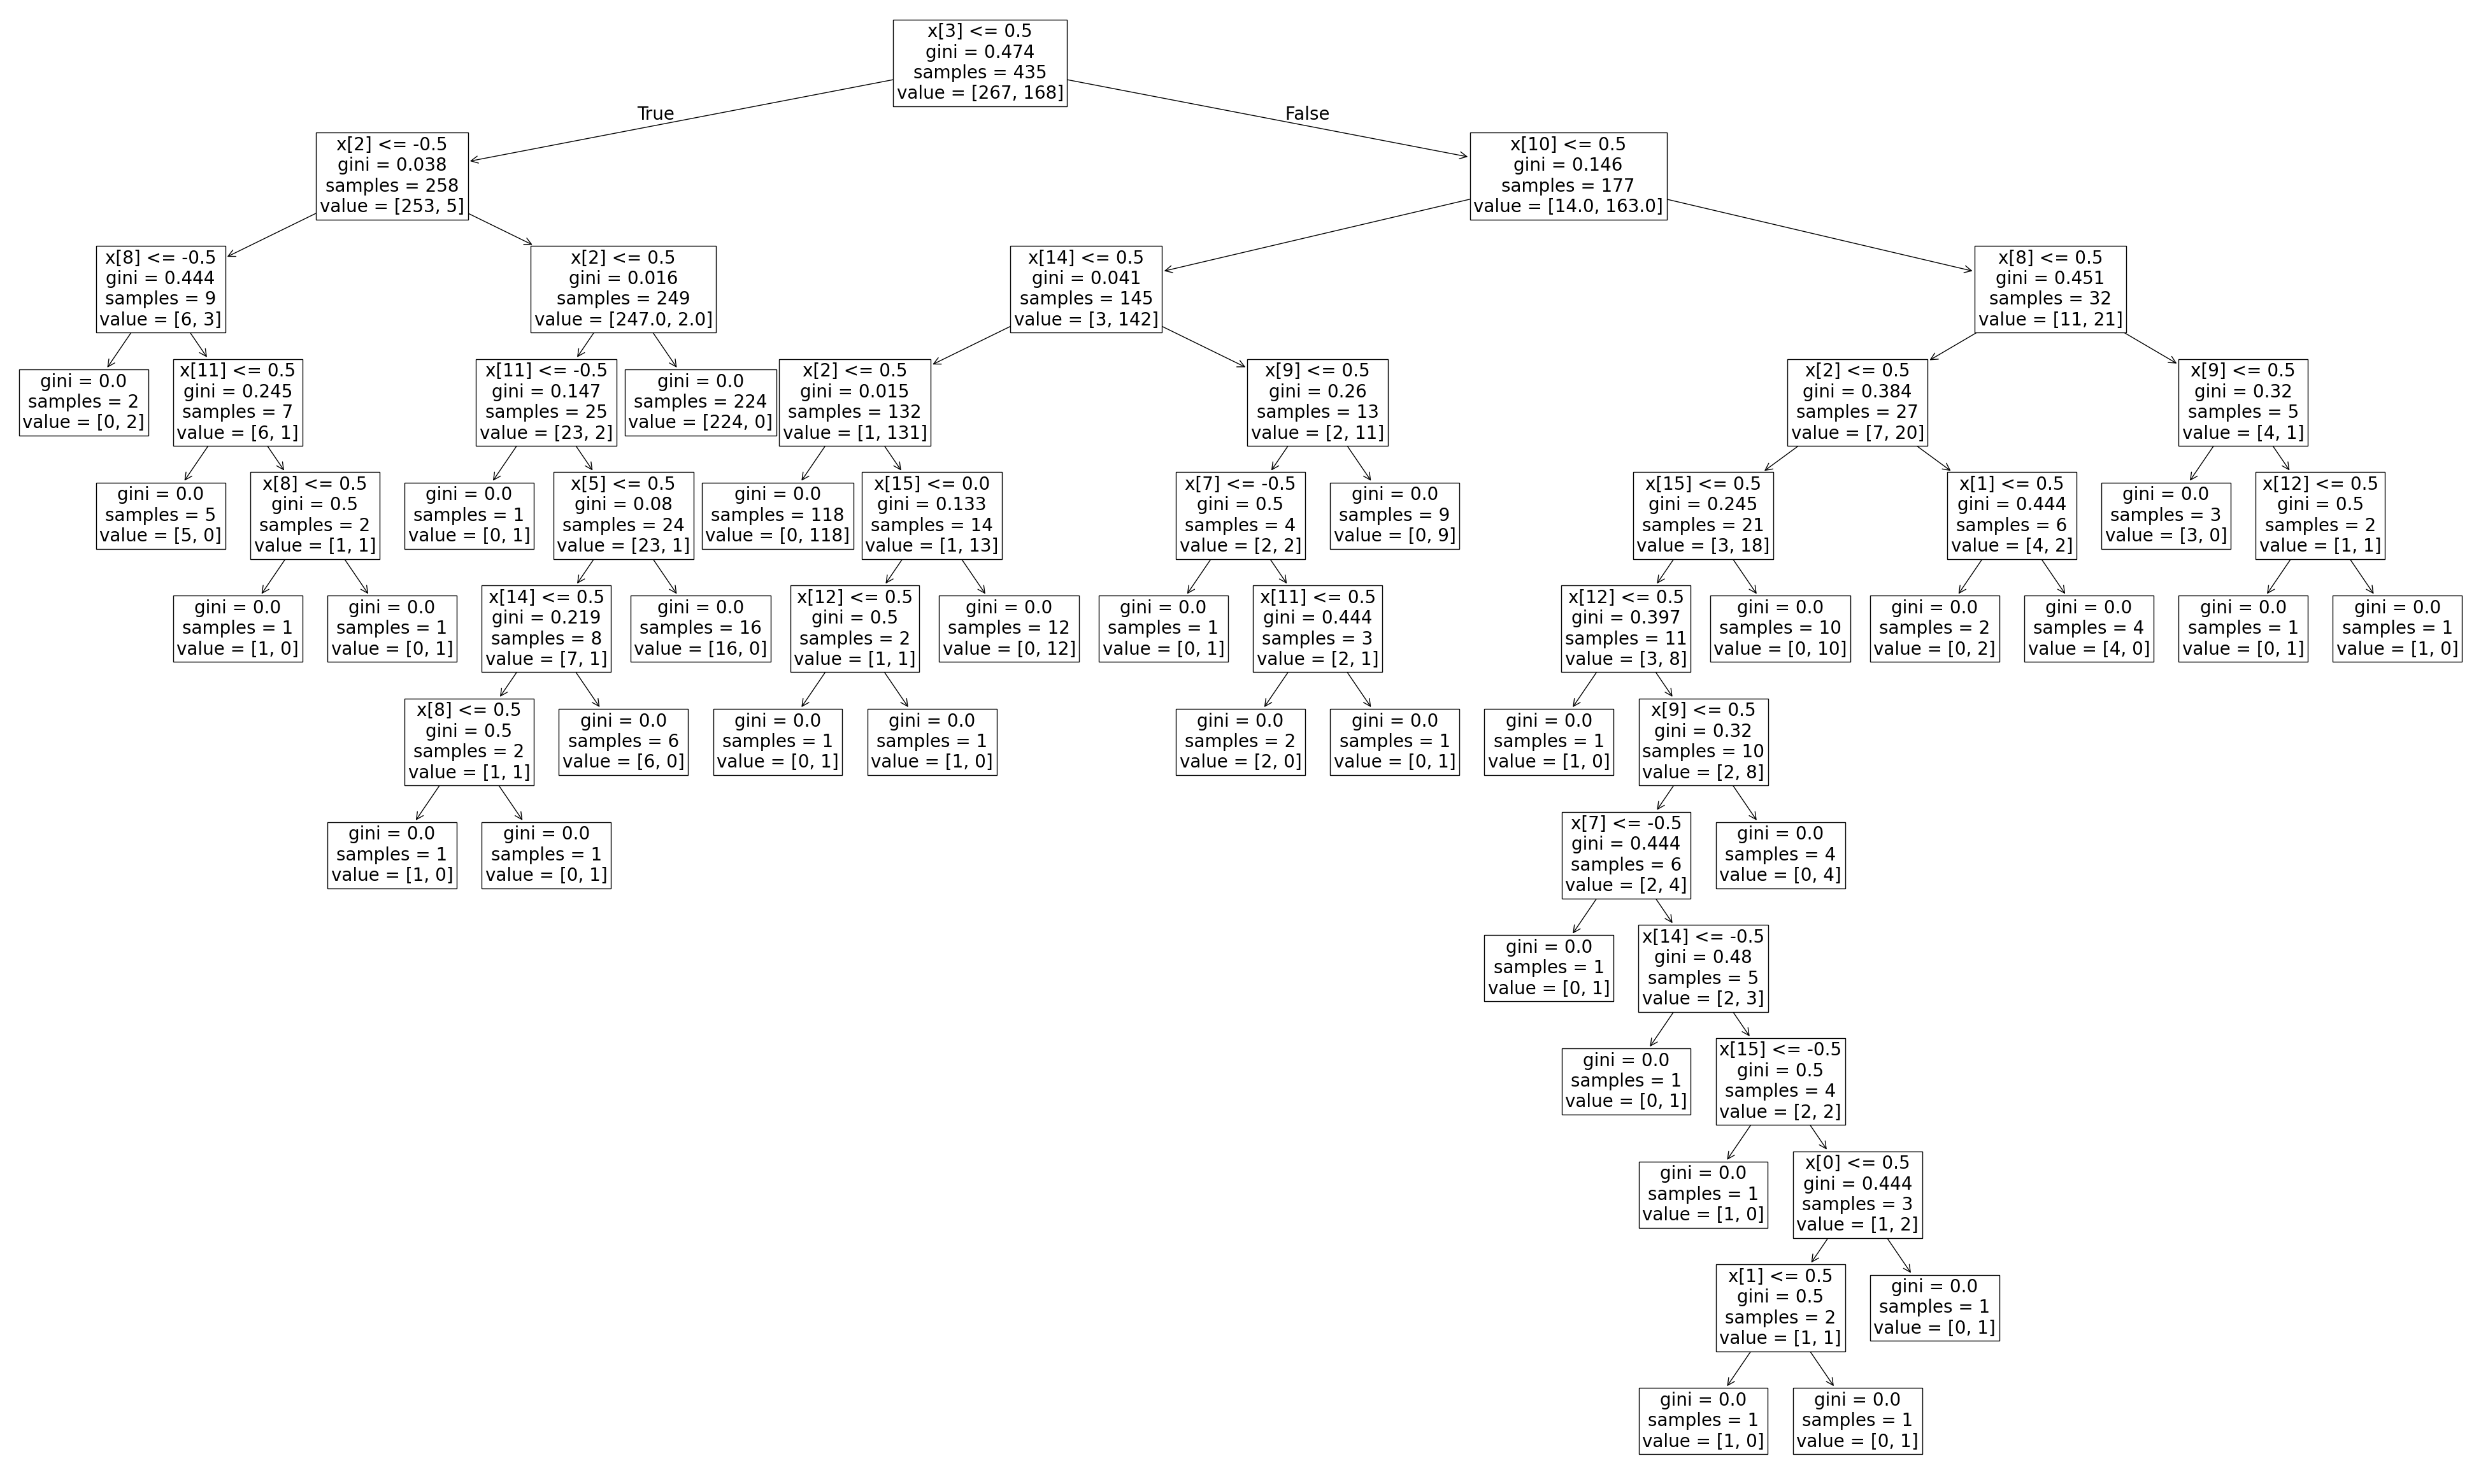

In [111]:
plt.figure(figsize=(50, 30))

print("Voting dataset tree (full)")
print(tree.plot_tree(clf_voting, fontsize=20))

Cars dataset tree (full)
[Text(0.626233552631579, 0.9615384615384616, 'x[5] <= 0.5\ngini = 0.457\nsamples = 1728\nvalue = [1210, 384, 69, 65]'), Text(0.6130756578947368, 0.8846153846153846, 'gini = 0.0\nsamples = 576\nvalue = [576, 0, 0, 0]'), Text(0.619654605263158, 0.9230769230769231, 'True  '), Text(0.639391447368421, 0.8846153846153846, 'x[3] <= 3.0\ngini = 0.579\nsamples = 1152\nvalue = [634, 384, 69, 65]'), Text(0.6328125, 0.9230769230769231, '  False'), Text(0.626233552631579, 0.8076923076923077, 'gini = 0.0\nsamples = 384\nvalue = [384, 0, 0, 0]'), Text(0.6525493421052632, 0.8076923076923077, 'x[0] <= 1.5\ngini = 0.629\nsamples = 768\nvalue = [250, 384, 69, 65]'), Text(0.41036184210526316, 0.7307692307692307, 'x[1] <= 1.5\ngini = 0.642\nsamples = 384\nvalue = [46, 204, 69, 65]'), Text(0.20230263157894737, 0.6538461538461539, 'x[5] <= 1.5\ngini = 0.688\nsamples = 192\nvalue = [8, 63, 69, 52]'), Text(0.07894736842105263, 0.5769230769230769, 'x[4] <= 0.5\ngini = 0.528\nsamples = 9

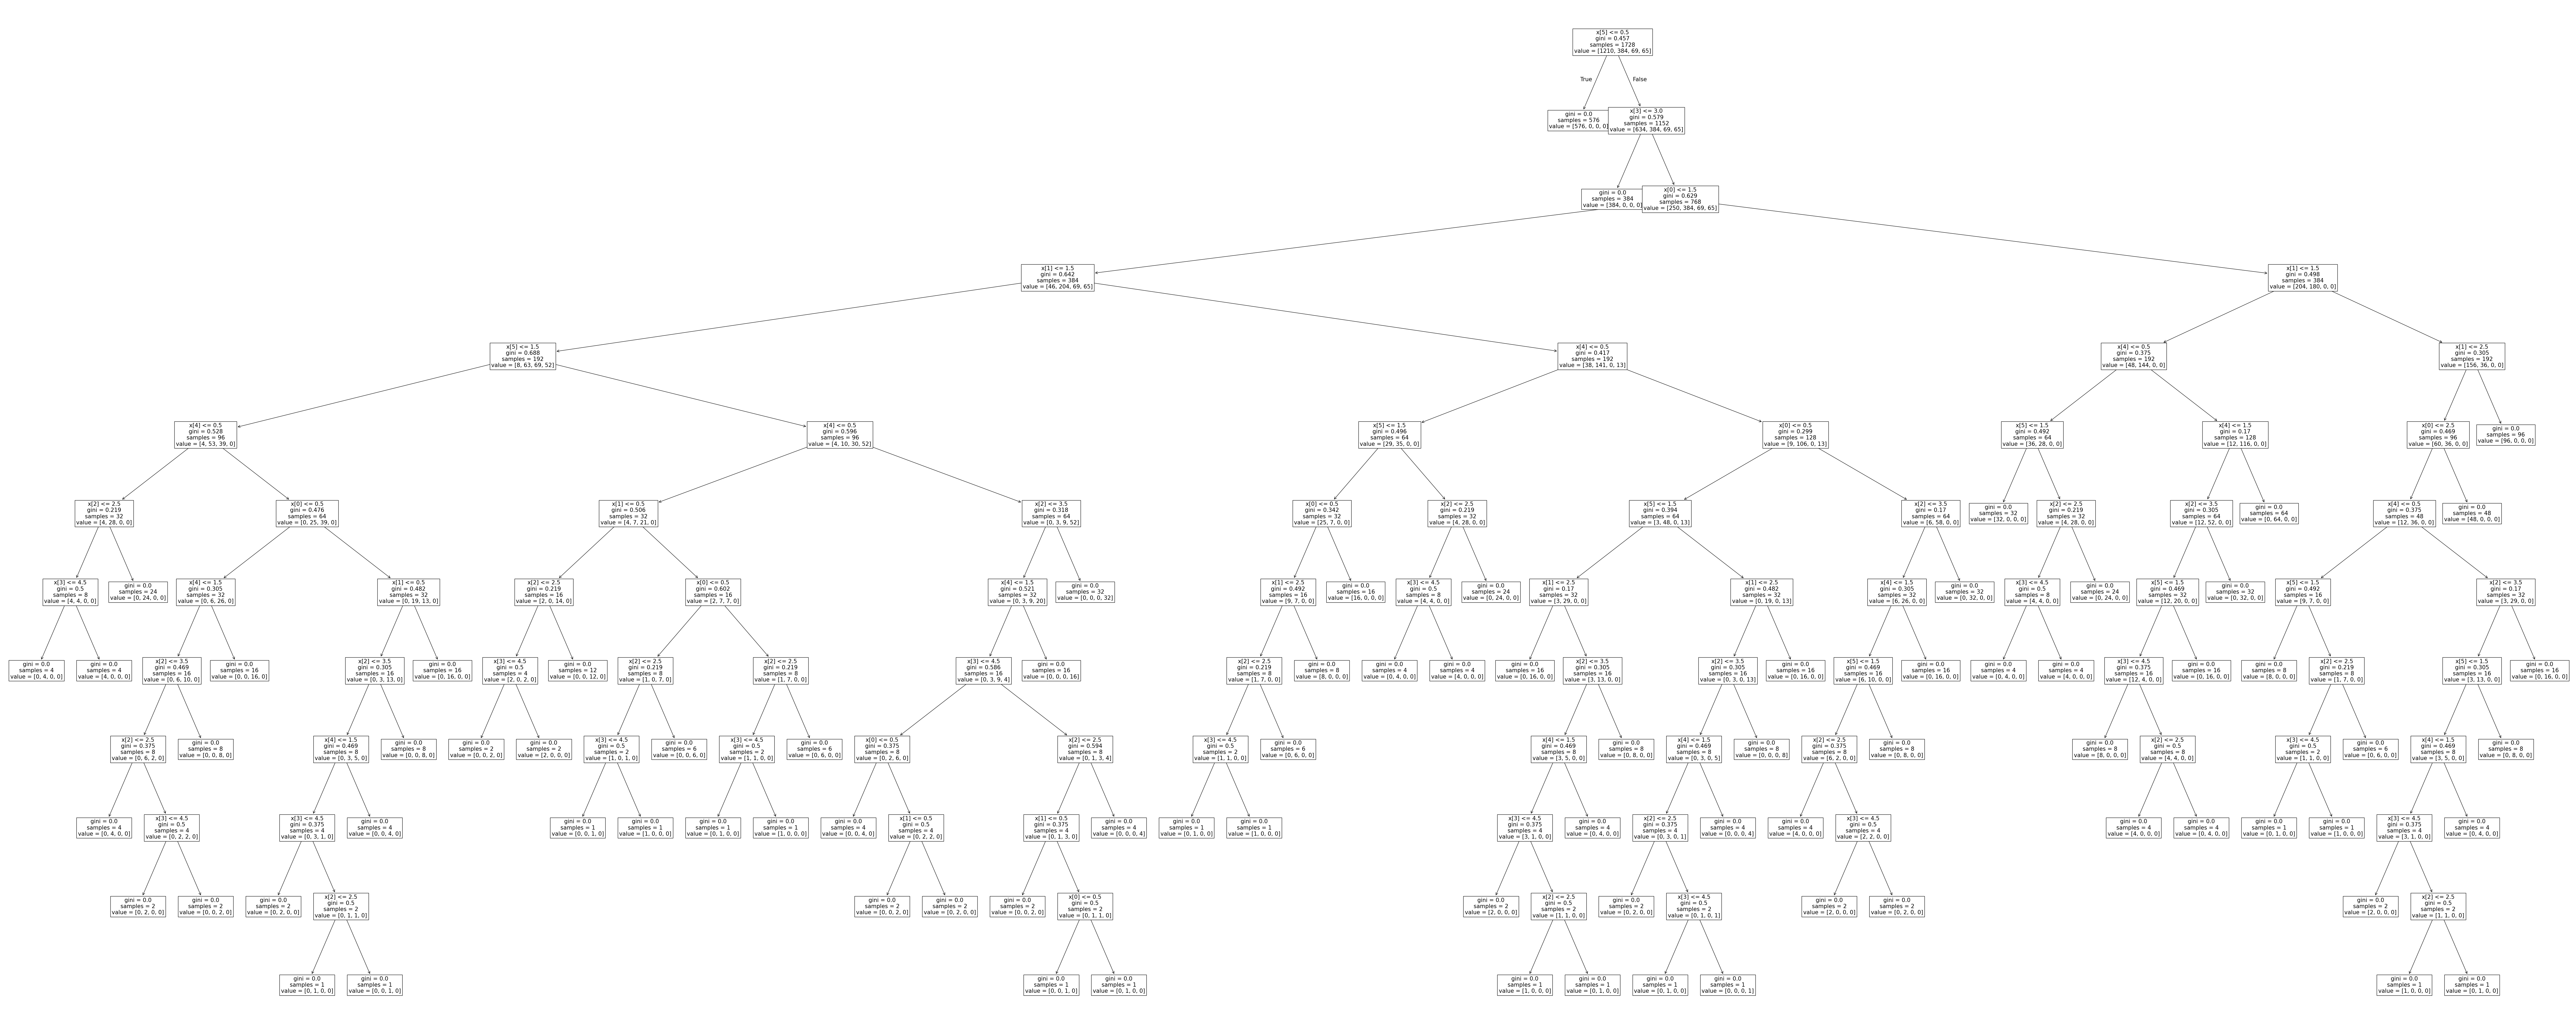

In [112]:
plt.figure(figsize=(125, 50))

print("Cars dataset tree (full)")
print(tree.plot_tree(clf_cars, fontsize=15))

Voting dataset tree (max_depth=2)
[Text(0.5, 0.875, 'x[3] <= 0.5\ngini = 0.474\nsamples = 435\nvalue = [267, 168]'), Text(0.25, 0.625, 'x[2] <= -0.5\ngini = 0.038\nsamples = 258\nvalue = [253, 5]'), Text(0.375, 0.75, 'True  '), Text(0.125, 0.375, 'x[8] <= -0.5\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'), Text(0.0625, 0.125, '\n  (...)  \n'), Text(0.1875, 0.125, '\n  (...)  \n'), Text(0.375, 0.375, 'x[2] <= 0.5\ngini = 0.016\nsamples = 249\nvalue = [247.0, 2.0]'), Text(0.3125, 0.125, '\n  (...)  \n'), Text(0.4375, 0.125, '\n  (...)  \n'), Text(0.75, 0.625, 'x[10] <= 0.5\ngini = 0.146\nsamples = 177\nvalue = [14.0, 163.0]'), Text(0.625, 0.75, '  False'), Text(0.625, 0.375, 'x[14] <= 0.5\ngini = 0.041\nsamples = 145\nvalue = [3, 142]'), Text(0.5625, 0.125, '\n  (...)  \n'), Text(0.6875, 0.125, '\n  (...)  \n'), Text(0.875, 0.375, 'x[8] <= 0.5\ngini = 0.451\nsamples = 32\nvalue = [11, 21]'), Text(0.8125, 0.125, '\n  (...)  \n'), Text(0.9375, 0.125, '\n  (...)  \n')]


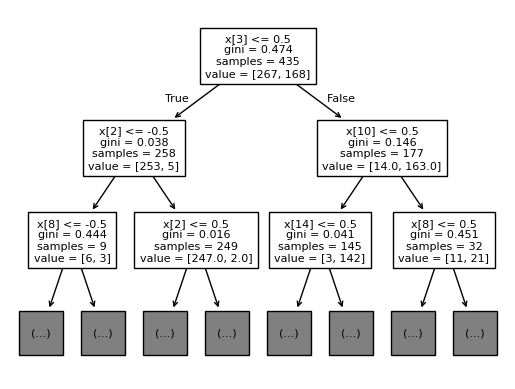

In [116]:
print("Voting dataset tree (max_depth=2)")
print(tree.plot_tree(clf_voting, max_depth=2, fontsize=8))

Cars dataset tree (max_depth=2)
[Text(0.3333333333333333, 0.875, 'x[5] <= 0.5\ngini = 0.457\nsamples = 1728\nvalue = [1210, 384, 69, 65]'), Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 576\nvalue = [576, 0, 0, 0]'), Text(0.25, 0.75, 'True  '), Text(0.5, 0.625, 'x[3] <= 3.0\ngini = 0.579\nsamples = 1152\nvalue = [634, 384, 69, 65]'), Text(0.41666666666666663, 0.75, '  False'), Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 384\nvalue = [384, 0, 0, 0]'), Text(0.6666666666666666, 0.375, 'x[0] <= 1.5\ngini = 0.629\nsamples = 768\nvalue = [250, 384, 69, 65]'), Text(0.5, 0.125, '\n  (...)  \n'), Text(0.8333333333333334, 0.125, '\n  (...)  \n')]


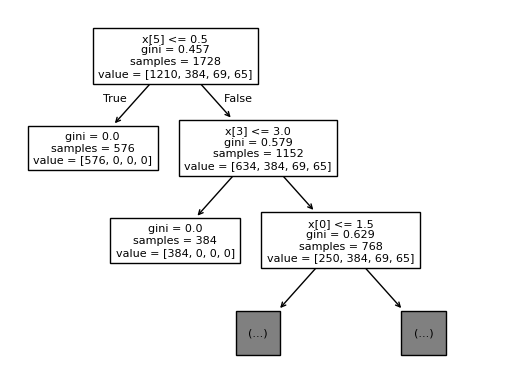

In [117]:
print("Cars dataset tree (max_depth=2)")
print(tree.plot_tree(clf_cars, max_depth=2, fontsize=8))

Discuss what the Trees have learned on the 2 data sets

To understand the tree, it is first important to understandwhat each value printed in the nodes means. X[index] represents the feature used to make the division for the node. Gini is similar to entropy. A gini value can range from between 0 and 1 where 0 means that there is 100% certainty and 1 means 0% certainty. If the gini value is 0, it means that the node is pure. Samples represents the number of samples in the node. value is the number of samples in the node for each classification.

I was orininally one-hot encoding my X values for both my voting and cars datasets, which worked fine for just running the algorithm. However, it was really difficult to read the decision tree and tell what was going on, so I gave my load functions a parameter 'use_one_hot_X' and set it to false for this section. Reading the trees was much more clear after that.

Looking at the tree for the `voting` dataset, you can see that `physician-fee-freeze` was used for the first split. This lowered the gini (more certainty)significantly for both child nodes. For example, looking at the root node's left child (<= 0.5 is true which means not supporting it), there are now 258 total nodes, 253 of which are Democrat, and only 5 of which are Republican. Therefore, not supporting the physician-fee-freeze means that you are VERY likely to be a democrat. The results are similar for supporting it.

The children of the roots left child were determined by `adoption-of-the-budget-resolution` which democrats tend to support. However, notice that the values placed in the left child were those <= -.5, so this is simply a split on the unknown values. The unknown values become the left branch, the the known valuesgo on the right. Notice that there are now only 2 republicans on the left child, which significantly lowered the gini value. To this point in the tree (R then L), we have already broken down classification in a pretty accurate way.

Looking at the cars dataset tree, we can see that the first split is done on the `safety` attribute. Safety of < 0.5 (low) is on the left and others (med, high) are on the right. You can see that this is a really good split because the left has 576 samples, all of which are unacceptable, meaning the gini is a perfect 0. The split on the right child is made using the `persons` attribute. If persons is < 3 (2 person), it goes on the left, and otherwise (4 or more), it goes on the right. Once again, this creates a perfect split on the left. This means that cars with 2 people (even when their safety rating is higher than low) are unacceptable.

Above, I printed the feature_importances, which were the following:

Voting dataset feature importances:  
`[1.61628322e-03 1.77791154e-02 2.33460170e-02 8.27422108e-01
 0.00000000e+00 8.08141609e-04 0.00000000e+00 4.52559301e-03
 3.27435249e-02 1.22091548e-02 2.65326564e-02 1.84787351e-02
 1.53399971e-02 0.00000000e+00 8.03162583e-03 1.11670477e-02]`

Cars dataset feature importances:  
`[0.11465189 0.17992196 0.05564352 0.26890523 0.11458927 0.26628813]`

These align with what I noticed from the decision trees. For example, with the voting dataset the importance for `physician-fee-freeze` is 0.827, which is very high, so it is not surprising that it was chosen as the first split. `adoption-of-the-budget-resolution` was not quite as obvious with an importance of 0. Its importance was 0.023, which, though being much lower, there were only 2 features other than physician-fee-freeze that were more important and that was only be a little bit, so it is understandable that this one was chosen due to the nuances of which inputs were actually in the branch.

Looking at the cars dataset feature importance, the `safety` attribute has 0.266 importance, which is beat only by `persons` which is 0.268. Because of this it is no surprise that safety was chosen as the first split and persons was chosenas the second split (done on the right child of root). Its interesting to see the splits on nodes follow the importances of the attributes that the nodes was split on.

Of course, however, this is not always that case. For example, if a certain split has already happened recently in the tree, there is little gain from doing the same split again. Also, for attributes that are strongly coorelated, there is little values in splitting on on both attributes close together.

### 2.4 (5%) Other Parameters
- For either of the data sets above experiment and discuss using a different split criterion (Compare Entropy and Log-loss with Gini)

In [41]:
# Experiment with criterion parameter
X, y = load_cars(use_one_hot_X=False)

headers = ["Trial", "gini", "", "entropy", "", "log_loss", ""]
table = [
    ["", "train", "test", "train", "test", "train", "test"],
    ["0"],
    ["1"],
    ["2"],
    ["3"],
    ["4"],
    ["5"],
    ["6"],
    ["7"],
    ["8"],
    ["9"],
    ["Avg", "", "", "", "", "", ""]]

criteria = ["gini", "entropy", "log_loss"]
for i, criterion in enumerate(criteria):
  for col in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = DecisionTreeClassifier(criterion=criterion)
    clf.fit(X_train, y_train)

    table[col].append(clf.score(X_train, y_train))
    table[col].append(clf.score(X_test, y_test))

for col in range(1, 7):
  sum = 0.0
  for row in range(1, 11):
    sum += table[row][col]

  table[11][col] = sum / 10

print(tabulate(table, headers=headers))

Trial    gini                        entropy                        log_loss
-------  ------  ------------------  ---------  ------------------  ----------  ------------------
         train   test                train      test                train       test
0        1.0     0.9682080924855492  1.0        0.9624277456647399  1.0         0.9855491329479769
1        1.0     0.9826589595375722  1.0        0.976878612716763   1.0         0.9884393063583815
2        1.0     0.9855491329479769  1.0        0.9884393063583815  1.0         0.9710982658959537
3        1.0     0.9682080924855492  1.0        0.9797687861271677  1.0         0.9739884393063584
4        1.0     0.9855491329479769  1.0        0.9710982658959537  1.0         0.9797687861271677
5        1.0     0.9710982658959537  1.0        0.976878612716763   1.0         0.9797687861271677
6        1.0     0.9710982658959537  1.0        0.9797687861271677  1.0         0.9826589595375722
7        1.0     0.9682080924855492  1.0      

Discuss criterion effects

The criterion parameter sets the function used to measure the quality of a split. When a split is made, each potential feature is compared, and the one with the best result is the one that is chosen for the split. The criterion is the equation that is used to determin the quality of a split at a particular attribute. The default is gini, which is what has been used in all problems above up to this point. Here I experiment with `gini`, `entropy`, and `log_loss`.

Gini is essentially the probability that a node would be misclassified if its classification was chosen from randomely from a bag of all the training points in the split. Entropy is very similar to Gini and is the level of uncertainty. For example, an entropy of 0 means that there is no uncertainty, so all test points in a node are of the same class. An entropy of 1 means complete certainty, so there is a completely even distribution of classes in a node. Log loss is good for classifiers with probabilities, and uses the log function in its equation.

Notice that in the results, the training set accuracy for every trial was 1.0. This is because there was no stopping criteria, so the tree fit perfectly to the training data in every case. As far as results go, I am not seeing much difference between the three criteria. The test set averages for each was just about 97.8%. The lack of distinction could have to do with the limited amount of data in the dataset. It could also have to do with the nature of the dataset. For example, if the data is fairly easy to classify, and there are a few common outliers in the test set that tend to trip the tree up and account for the ~2% inaccuracy, then it may not make much of a difference which criterion is used for deciding splits.

## 3 Overfit Avoidance with Decision Trees  

Above, you found typical training and test set scores for the Cars data set when the tree is induced as far as it can go (until classes are pure or there are no more data or attributes to split on).  This usually leads to great training set scores but can potentially overfit and get lower accuracy on the test set.  You will now experiment with methods which can help avoid overfit and which could lead to better test set accuracy (though training set accuracy may decrease).  

### 3.1 Smaller and Simpler Trees (20%)
- tree_: [Read about](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) the tree_ attribute with its sub attributes and methods allowing you to interact with your learned tree.  You don't have to do any specific task for this part.
- Use an 80/20 train/test split for all experiments in this part and induce (learn/fit) the full tree for Cars.
- For the fully induced tree print out
    - Training set accuracy
    - Test set accuracy
    - Total number of nodes (clf.tree_.node_count)
    - Maximum tree depth (clf.tree_.max_depth)
- Experiment with the following parameters which lead to smaller and/or simpler trees which can help with overfit.  Try a few different values of each parameter and compare their train and test set accuracies and number of nodes and depth with the fully induced tree.  If you are not sure how parameters are actually working, print some trees to see their effect.  Due to the simplicity of the Cars data set you may not see as great of accuracy improvements as you would for cases where overfit is more prominent.  
    - min_samples_leaf
    - min_samples_split
    - min_impurity_decrease
- Try these parameters also, but note that they could lead to underfit
    - max_depth
    - max_leaf_nodes
    - max_features

In [33]:
# Explore different overfit parameters

# 1) Fully Induced Tree
X, y = load_cars(use_one_hot_X=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

print("Fully Induced Tree:")
print("   Training set accuracy: ", str(clf.score(X_train, y_train)))
print("   Test set accuracy: ", str(clf.score(X_test, y_test)))
print("   Total # nodes: ", str(clf.tree_.node_count))
print("   Maximum tree depth: ", str(clf.tree_.max_depth))
print()

# 2) Experiment with additional parameters
default_params = {
    'random_state': 0
}

trials = [
  # Minimum # samples required to be in each leaf node
  [{'min_samples_leaf': 1}, "\nMin Samples Leaf: 1"], # default is 1
  [{'min_samples_leaf': 2}, "Min Samples Leaf: 2"],
  [{'min_samples_leaf': 5}, "Min Samples Leaf: 5"],
  [{'min_samples_leaf': 10}, "Min Samples Leaf: 10"],
  [{'min_samples_leaf': 20}, "Min Samples Leaf: 20"],
  # Minimum # samples required to split a node
  [{'min_samples_split': 2}, "\nMin Samples Split: 2"], # default is 2
  [{'min_samples_split': 4}, "Min Samples Split: 4"],
  [{'min_samples_split': 8}, "Min Samples Split: 8"],
  [{'min_samples_split': 16}, "Min Samples Split: 16"],
  [{'min_samples_split': 32}, "Min Samples Split: 32"],
  # Node only split if the split decreases impurity by at least this amount
  [{'min_impurity_decrease': 0.0}, "\nMin purity decrease: 0.0"], # default is 0.0
  [{'min_impurity_decrease': 0.0001}, "Min purity decrease: 0.0001"],
  [{'min_impurity_decrease': 0.001}, "Min purity decrease: 0.001"],
  [{'min_impurity_decrease': 0.01}, "Min purity decrease: 0.01"],
  [{'min_impurity_decrease': 0.1}, "Min purity decrease: 0.1"],
  # Maximum depth of the tree - MAY CAUSE UNDERFIT
  [{'max_depth': None}, "\nMax depth: None"], # default is None
  [{'max_depth': 10}, "Max depth: 10"],
  [{'max_depth': 7}, "Max depth: 7"],
  [{'max_depth': 5}, "Max depth: 5"],
  [{'max_depth': 3}, "Max depth: 3"],
  [{'max_depth': 2}, "Max depth: 2"],
  [{'max_depth': 1}, "Max depth: 1"],
  # Maxumum # leaf nodes in 'best-first fashion' - MAY CAUSE UNDERFIT
  [{'max_leaf_nodes': None}, "\nMax leaf nodes: None"], # default is None
  [{'max_leaf_nodes': 50}, "Max leaf nodes: 50"],
  [{'max_leaf_nodes': 25}, "Max leaf nodes: 25"],
  [{'max_leaf_nodes': 15}, "Max leaf nodes: 15"],
  [{'max_leaf_nodes': 10}, "Max leaf nodes: 10"],
  [{'max_leaf_nodes': 5}, "Max leaf nodes: 5"],
  # Maximun # feature to consider when making a split - MAY CAUSE UNDERFIT
  [{'max_features': None}, "\nMax features: None"], # default is None
  [{'max_features': 5}, "Max features: 5"],
  [{'max_features': 4}, "Max features: 4"],
  [{'max_features': 3}, "Max features: 3"],
  [{'max_features': 2}, "Max features: 2"],
  [{'max_features': 1}, "Max features: 1"]
]

for trial in trials:
  trial_params, trial_title = trial[0], trial[1]
  params = {**default_params, **trial_params}

  clf = DecisionTreeClassifier(**params)
  clf.fit(X_train, y_train)

  print(trial_title)
  print("   Training set accuracy: ", str(clf.score(X_train, y_train)))
  print("   Test set accuracy: ", str(clf.score(X_test, y_test)))
  print("   Total # nodes: ", str(clf.tree_.node_count))
  print("   Maximum tree depth: ", str(clf.tree_.max_depth))

Fully Induced Tree:
   Training set accuracy:  1.0
   Test set accuracy:  0.9682080924855492
   Total # nodes:  143
   Maximum tree depth:  11


Min Samples Leaf: 1
   Training set accuracy:  1.0
   Test set accuracy:  0.9682080924855492
   Total # nodes:  143
   Maximum tree depth:  11
Min Samples Leaf: 2
   Training set accuracy:  0.9942112879884226
   Test set accuracy:  0.9682080924855492
   Total # nodes:  127
   Maximum tree depth:  10
Min Samples Leaf: 5
   Training set accuracy:  0.9710564399421129
   Test set accuracy:  0.9364161849710982
   Total # nodes:  93
   Maximum tree depth:  9
Min Samples Leaf: 10
   Training set accuracy:  0.9536903039073806
   Test set accuracy:  0.9479768786127167
   Total # nodes:  71
   Maximum tree depth:  8
Min Samples Leaf: 20
   Training set accuracy:  0.9406657018813314
   Test set accuracy:  0.9277456647398844
   Total # nodes:  45
   Maximum tree depth:  7

Min Samples Split: 2
   Training set accuracy:  1.0
   Test set accuracy:  0.968208

Discussion

The fully induced tree alone performed pretty well. As expected, the training set accuracy was 1.0 because it is fit perfectly to the training set.

## min_samples_leaf
This is the minimum number of samples required to be in each leaf node. The
Minimum # samples required to be in each leaf node. The default value is 1, meaning that it can split all the way.

As I raised this value, the total # nodes and maximum tree depth both decrease as expected. The training set accuracy also decreased which was also expected. It is interesting, however, that the test set accuracy actually didn't improve. The idea is to limit the number of splits, to avoid overfit. I think the discrepency here is simply due to the limited test set size.

## min_samples_split
This is the minimum number of samples required to split a node, and its default is 2. As you increase this number, there will be less nodes that will be splitable. This is very similar to min_samples_leaf, just that it makes the split decision from the parent node's point of view rather than the child's.

As in min_samples_leaf, the tree became less complex as I increased the value.Training set accuracy decreased as expected due to not fitting the tree perfectly to the training set, but once again, the test set accuracy decreased. Again, I believe this discrepency is due to a limited amount test data.

## min_impurity_decrease
This parameter sets the minimum of impurity improvement to allow a split to happen. If a split won't decrease impurity by a certain amount, it may be overfitting. It's default value is 0.0.

Results were again similar to the parameters tested above. Increasing the min purity decrease from 0 up to 0.001 didn't cause a noticable decrease in performance. However, bumping it up to 0.01 dropper accuracy by about 10% and 0.1 dropped it another 17% down to 69%. With the value set so high, there are a lot of splits that probably should have taken place but were not done. I believe that a relatively small dataset is again the main reason for the sweet spot being 0.

## max_depth
This is the maximum depth of the tree. As warned in the instructions above, it is clear that this did cause underfit. However, dropping the depth to to nodes (where the natural depth was 11), DID improve performance. This was the sweet spot for this case.

Below a max depth of 10, the test set accuracy dropped fairly consistently, droping down to 69% at a max depth of 1.

## max_leaf_nodes
This is the maximum number of total leaf nodes, and the documentation says that the leaf nodes that get to stay are determined in a 'best-first' fashion. This metric is basically the equivalent of saying that we will create a total of n classification groups, so could be very useful when you have a reason to limit that number.

I saw no improvement from lowering the value. Decreasing it did linearly decrease the total number of nodes and maximum tree depth as well.

## max_features
This sets the maximum number of features that are considered each time a split is made. I see no reason to ever use this other than for lowering training time. Lowering this number increases the chance that we don't look at the best attribute for a split and miss out on it which we don't want to do. However, it computation resources are a large constraint, using this may be necessary.

My intuition did check out with the actual results. There is a pretty linear decrease in test set accuracy as the max features value was lowered. Note that the training set accuracy is still 1.0. This is because max_features doesn't set any limits on how deep the tree will be trained, so it is perfectly fit to the training data. Any other value would have been concerning.



### 3.2 (10%) Tree Reduction
Another approach to avoiding overfit is using pruning to reduce fully induced trees.  Induce the tree fully for Cars (no simplifying parameters such as max_depth).  Prune by setting the [ccp_alpha](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) parameter to a positive value. This parameter controls how aggressive the pruning is. Try some small values (e.g. ,001, ,005, etc.) and try to find and report the value which works the best.  Make a table with at least 5 ccp_alpha values and for each value include
- Training set accuracy (you chooses the size of the train/test split)
- Test set accuracy
- Total number of nodes (clf.tree_.node_count)
- Maximum tree depth (clf.tree_.max_depth)

In [45]:
# Pruning
X, y = load_cars(use_one_hot_X=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

headers = ["ccp_alpha", "training accuracy", "test accuracy", "total # nodes",
           "maximum tree depth"]
table = []

# how agressive pruning is
ccp_alphas = [0.0, 0.0001, 0.001, 0.01, 0.1]
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)

  table.append([ccp_alpha, str(clf.score(X_train, y_train)),
                str(clf.score(X_test, y_test)), str(clf.tree_.node_count),
                str(clf.tree_.max_depth)])

print(tabulate(table, headers=headers))

  ccp_alpha    training accuracy    test accuracy    total # nodes    maximum tree depth
-----------  -------------------  ---------------  ---------------  --------------------
     0                  1                0.968208              143                    11
     0.0001             1                0.968208              143                    11
     0.001              0.993488         0.965318              107                    10
     0.01               0.929812         0.901734               25                     6
     0.1                0.701881         0.693642                1                     0


Discussion

ccp_alphas is a hyperparameter that determines how agressive pruning is. 0 is the default value meaning that no pruning is performed by defualt. For my trials, I gradually increased the value. By the time ccp_alpha was 0.1, the tree was pruned to only have 1 node left, which significantly decreased accuracy. With the small value of 0.0001, it was too insignificant to cause any pruning, so its value was the same as the default 0.

I saw no improvement in test accuracy, which I was a little surprised about because I would have thought that even at 0.001, enough overfit would be avoided to improve thetest accuracy some, but it dropped by a fairly insignificant amount (about 0.3%).Increasing the ccp_alpha value further yielded only a decrease in test performance. Becasue we were pruning, it did, however, make the tree size smaller, so maybe if you wanted to deploy the model in a machine with an incredibly limited amount of memory or wanted it to be extremely fast and high accuracy wasn't that important, it might make sense to prune. I believe that if the dataset were bigger, pruning may improve results. I think the amount of disparity in the dataset would also make a difference. If most data follows very similar patterns, I don't think pruning would help much but for when the data does need more generalization, it would be more important.

## 4. Decision Tree Regression
### 4.1 (15%) Learn a real-world regression data set of your choice (not already used in this or previous labs)
- Report tree statistics (# of nodes, # of leaf nodes, max depth)
- Report MAE on the training and test set (you choose the size of the train/test split)
- Report the DT regressor score for the training and test set.  Note that for the DT regressor this score is the coefficient of determination. Google it if you are curious.

In [53]:
# Learn regression data set
X, y = load_cpu()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

regr = DecisionTreeRegressor()
regr.fit(X_train, y_train)
print("Regression on the CPU dataset:")
print("   # total nodes: ", str(regr.tree_.node_count))
print("   # leaf nodes: ", str(regr.tree_.n_leaves))
print("   Max depth: ", str(regr.tree_.max_depth))
print("   Training set MAE: ", str(mean_absolute_error(regr.predict(X_train), y_train)))
print("   Test set MAE: ", str(mean_absolute_error(regr.predict(X_test), y_test)))
print("   DT regressor training set score: ", str(regr.score(X_train, y_train)))
print("   DT regressor test set score: ", str(regr.score(X_test, y_test)))

Regression on the CPU dataset:
   # total nodes:  293
   # leaf nodes:  147
   Max depth:  16
   Training set MAE:  1.8690618762475049
   Test set MAE:  33.84920634920635
   DT regressor training set score:  0.9975794480511108
   DT regressor test set score:  0.838235617337443


Discussion

I found a regression dataset online for predicting CPU performance. The output is a real number representing a performance metric. Looking at the results, there doesn't seem to be anything abnormal or interesting about the number of total nodes, number of leaf nodes, or maximum depth. However, it is very interesting to see the difference in mean absolute error (MAE) between the training and test sets. MAE is simply the average difference in predicted value vs actual value. You can see that on the training set, MAE was only 1.87, which is really low. If you look at the arff file for this problem, you can see that the output value ranges from about 8 to 1150, which is a really big range. Even with this large range, the training set MAE was less than 2, meaning that it was really well fit for it.

However, when you look at the test set MAE, it is 33.84, which is about 16x as much as that of the test set. I think that this large disperity is pretty clearly explained by the fact that I don't have any stopping criteria. The model is clearly overfit to the training data. However, the test MAE isn't aweful because it is at least getting a general ballpark of the CPU performance. I imagine that I could improve this by messing around with some of the early stopping hyperparameters.

Looking at the scores, this supports everything found in the last paragraph. The training set score is 0.9975 which is almost perfect. This was the same with the MAE. The test set score is 0.8382, though I don't believe this number is an exact one-to-one equivalent to MAE.

## 5. (Optional 15% extra credit) Code up your own C4.5 Decision Tree Learner
Implement the C4.5 algorithm discussed in class and in the slides, NOT the CART algorithm.  Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Use standard information gain as your basic attribute evaluation metric.  Note that C4.5 would usually augment information gain with a mechanism to penalize statistically insignificant attribute splits to avoid overfit (e.g. early stopping, gain ratio, etc.), but you are not required to do that.
- Include the ability to handle unknown attributes by making "unknown" a new attribute value when needed.
- You do not need to handle real valued attributes.
- It is a good idea to use simple data set (like the pizza homework), which you can check by hand, to test each detailed step of your algorithm to make sure it works correctly.
- Run your algorithm on the voting data set above with unknown attributes and compare your results with CART.

Discussion

I'm pretty happy with how my decision tree classifier turned out. It took quite a bit of time, but it was worth it to see the results! The code could definitely be cleaned up a little bit,but due to time constraints, I decided to leave it as it is. I used the pizza dataset from the homework to verify that it works right and everything does.

Something important to note about my implementation is that when I split a node, after finding the best attribute to split on (using information gain), to decide which values of the attribute to put on the left and which ones to put on the right, I simply take the samples with the value that is most common and put them on the left, and then put all the rest of the samples with all other values of the attribute on the right. Ideally, from what I read online, the algorithm would try every possible combination of values on the left and the right, and use the optimal combination. Since we never talked about this in class, and never had any examples, I decided to use my simpler implementation instead.

If you scroll to the bottom, you can see the results from testing on the pizza, cars, and voting datasets. Since there was only a training set for the pizza dataset, I tested on the training set, and got 100% accuracy, which is expected for scoring on the training set. My implementation has no overfit avoidance, so the tree fits perfectly to the training data.

For the cars dataset, I scored 93.64% which was pretty good! On the voting dataset (which has missing values), I scored 89.96 percent while the CART algorithm scored 94.25%. I think the drop in improvement on mine is due to the my implementation decision described above. I am still pretty happy with almost 90% though! As expected, for all sets, scoring on the training data yielded 100% accuracy.

I also implemented a way to visualize the trees. For the pizza and voting datasets, I printed out the tree below and everything seems to check out with what I expect. I didn't print the tree for the cars dataset because it was pretty big.

In [103]:
from sklearn.base import BaseEstimator, ClassifierMixin

class DTNode():
  def __init__(self, node_path: str, samples: List[int], class_counts: List[int], entropy: float):
    self.node_path: str = node_path # path to node (EX: 'LRLL')
    self.samples: List[int] = samples # indexes of samples included in the node
    self.class_counts: List[int] = class_counts # count of instances of each class (as an array)
    self.entropy: float = entropy

    self.split_attr_i: int | None = None # index of attr used for split (i.e. index of pizza crust attr if crust is split_attr)
    self.split_left_vals: List[float] = None # values of attr on the left of the tree (i.e. deep & stuffed)
    self.split_right_vals: List[float] = None # values of attr on right of the tree (i.e. thin)
    self.left: DTNode | None = None
    self.right: DTNode | None = None

  def get_n_samples(self):
    return len(self.samples)

  def get_n_attributes(self):
    return self.X.shape[1]

  def __str__(self):
    return f"""node_path: {self.node_path}
      entropy: {self.entropy}
      n_samples: {self.get_n_samples()}
      samples: {self.samples}
      class_counts: {self.class_counts}
      split_attr_i: {self.split_attr_i}
      split_left_vals: {self.split_left_vals}
      split_right_vals: {self.split_right_vals}
      l_child: {self.left.node_path if self.left else None}
      r_child: {self.right.node_path if self.right else None}"""


class DTClassifier(BaseEstimator,ClassifierMixin):
  """
  Implementation Notes:
    - This ONLY allows categorical data (not continuous)
    - To save memory, samples aren't copied for each node. Rather, each node has
      a list of indexes of samples, and grab the samples from X and y when
      needed
    - When splitting on an attribute with >2 values, I currently place samples
      whose value equals the most common on the left, and all other samples on the
      right. (This isn't perfect and could be swapped for a better system later)
      EX: class counts = [deep=2, stuffed=5, thin=1]
          `stuffed` is most common, so the children would be split as follows:
          [left_child: stuffed (5 total)], [right_child: deep or thin (3 total)]
  """

  def fit(self, X: ndarray, y: ndarray):
    """ Fit the data; Make the Decision tree

    Args:
      X (array-like): A 2D numpy array with the training data, excluding targets
      y (array-like): A 1D numpy array with the training targets

    Returns:
      self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
    """
    self._init_cache(X, y)

    self._build_tree(self.root)

    return self

  def predict(self, X) -> ndarray:
    """ Predict all classes for a dataset X

    Args:
      X (array-like): A 2D numpy array with the training data, excluding targets

    Returns:
      array, shape (n_samples,)
        Predicted target values per element in X.
    """
    n = X.shape[0]

    res = np.zeros(n)
    for i in range(n):
      res[i] = self._predict(self.root, X[i])

    return res

  def score(self, X, y):
    """ Return accuracy(Classification Acc) of model on a given dataset. Must implement own score function.

    Args:
      X (array-like): A 2D numpy array with data, excluding targets
      y (array-like): A 1D numpy array of the targets
    """
    predictions = self.predict(X)

    matching = 0
    for i in range(len(y)):
      if y[i] == predictions[i]:
        matching += 1

    return matching / len(y)

  def _predict(self, node: DTNode, sample: ndarray) -> int:
    if self._is_pure_node(node.samples):
      # base case: at leaf node - assign its class
      return self._get_pure_node_class(node.samples)

    value = sample[node.split_attr_i]

    if value in node.split_left_vals:
      return self._predict(node.left, sample)
    return self._predict(node.right, sample)

  def _init_cache(self, X: ndarray, y: ndarray) -> None:
    self.X = X
    self.y = y

    # list of distinct values for each attribute
    # [attr_0_distinct_vals, attr_1_distinct_vals, ...]
    self.attributes = [list(set(col)) for col in self.X.T]
    self.classes = list(set(self.y))
    self.n_attr = len(self.attributes)
    self.n_classes = len(self.classes)

    self.root = self._init_root()

  def _init_root(self) -> DTNode:
    root_node_path = ""
    root_samples = list(range(self.X.shape[0])) # include all samples in root
    root_class_counts = self._compute_class_counts(root_samples)
    root_entropy = self._compute_entropy(root_samples)

    return DTNode(root_node_path, root_samples, root_class_counts, root_entropy)

  def _build_tree(self, node: DTNode) -> None:
    self._split_node(node)

    if node.left:
      self._build_tree(node.left)
      self._build_tree(node.right)

  def _split_node(self, node: DTNode) -> None:
    '''If split, both left and right children will be created'''

    if self._is_pure_node(node.samples):
      # base case: pure node
      return

    # find best attribute to split on
    information_gains = [
      self._compute_information_gain_for_attr(node.samples, attr_i)
      for attr_i in range(self.n_attr)
    ]
    split_attr_i = information_gains.index(max(information_gains))

    # find most common value for chosen split attribute
    most_common_attr_val = self._get_attr_val_with_most_samples(node.samples, split_attr_i)

    # split vals
    # left: most common attribute value
    # right: all other possible values
    left_vals = [most_common_attr_val]
    right_vals = [val for val in self.attributes[split_attr_i] if val != most_common_attr_val]

    # split samples
    left_samples = []
    for i in node.samples:
      if self._get_val(i, split_attr_i) == most_common_attr_val:
        left_samples.append(i)
    right_samples = [i for i in node.samples if i not in left_samples]

    node.split_attr_i = split_attr_i
    node.split_left_vals = left_vals
    node.split_right_vals = right_vals

    node.left = DTNode(
      self._get_node_path(node.node_path, is_left_child=True),
      left_samples,
      self._compute_class_counts(left_samples),
      self._compute_entropy(left_samples)
    )

    node.right = DTNode(
      self._get_node_path(node.node_path, is_left_child=False),
      right_samples,
      self._compute_class_counts(right_samples),
      self._compute_entropy(right_samples)
    )

  def _compute_information_gain_for_attr(self, samples: List[int], attr_i: int):
    '''IG_attr = Info(S) - Info_attr(S)'''
    return self._compute_entropy(samples) - self._compute_info_for_attr(samples, attr_i)

  def _compute_entropy(self, samples: List[int]) -> float:
    """
    entropy = -Σ (from c in |c|) (p_c * log_2(p_c))
    p_c = count(c) / n_samples
    """
    class_counts = self._compute_class_counts(samples)
    n_samples = len(samples)

    entropy = 0.0
    for count in class_counts:
      if count != 0.0:
        p_c = count / n_samples

        entropy -= p_c * math.log(p_c, 2)

    return entropy

  def _compute_info_for_attr(self, samples: List[int], attr_i: int) -> float:
    info = 0.0
    for val in self.attributes[attr_i]:
      samples_with_attr_val = self._get_samples_with_attr_val(samples, attr_i, val)

      info += (len(samples_with_attr_val) / len(samples)) * self._compute_entropy(samples_with_attr_val)

    return info

  def _get_val(self, sample_i: int, attr_i: int) -> float:
    return self.X[sample_i, attr_i]

  def _get_samples_with_attr_val(self, samples: List[int], attr_i: int, val: float) -> List[int]:
    res = []

    for i in samples:
      if self._get_val(i, attr_i) == val:
        res.append(i)

    return res

  def _get_attr_val_with_most_samples(self, samples: List[int], attr_i) -> float:
    val_counts = defaultdict(int)
    for i in samples:
      sample_val = self._get_val(i, attr_i)

      val_counts[sample_val] += 1

    return max(val_counts, key=val_counts.get)

  def _get_node_path(self, parent_path: str, is_left_child: bool) -> str:
    return parent_path + ('L' if is_left_child else 'R')

  def _compute_class_counts(self, samples: List[int]) -> List[int]:
    class_counts = [0] * self.n_classes
    for i in samples:
      clss = self.y[i]
      class_counts[self.classes.index(clss)] += 1

    return class_counts

  def _is_pure_node(self, samples: List[int]):
    '''Node is pure if it only contains instances of one class'''
    class_counts = self._compute_class_counts(samples)

    n_classes_with_nodes = sum(count > 0 for count in class_counts)

    assert(n_classes_with_nodes != 0)

    return n_classes_with_nodes == 1

  def _get_pure_node_class(self, samples:List[int]) -> float:
    class_counts = self._compute_class_counts(samples)

    class_i = -1
    for i, count in enumerate(class_counts):
      if count > 0:
        class_i = i

    assert(class_i != -1)

    return self.classes[class_i]

  def __str__(self):
    s = []
    depth = 0

    layer = [self.root]
    while layer:
      s.append("\nDepth: " + str(depth))
      next = []
      for node in layer:
        s.append(str(node))

        if node.left:
          next.append(node.left)
          next.append(node.right)

      layer = next
      depth += 1

    return '\n'.join(s)

In [107]:
# Debugging Dataset - Pizza Homework
X = np.array([[1,2,0],[0,0,0],[0,1,1],[1,1,1],[1,0,0],[1,0,1],[0,2,1],[1,0,0],[0,2,0]])
y = np.array([2,0,1,2,1,2,1,1,0])

clf = DTClassifier().fit(X, y)

# (1) clf.predict()
predictions = clf.predict(X)
print("Predict:")
print("Expected predictions: ", str(y))
print("Actual predictions: ", str(predictions))
assert(np.array_equal(y, predictions))

# (2) clf.score()
score = clf.score(X, y)
print("\nScore:")
print(score)
assert(score == 1.0)

# (3) Print Tree
# note that splits are ordered with samples of the most common val on the left,
# and samples of all other values on the right. Because of this, NODE LL ON THE
# HW IS LR HERE
print(clf)



Predict:
Expected predictions:  [2 0 1 2 1 2 1 1 0]
Actual predictions:  [2. 0. 1. 2. 1. 2. 1. 1. 0.]

Score:
1.0

Depth: 0
node_path: 
      entropy: 1.5304930567574826
      n_samples: 9
      samples: [0, 1, 2, 3, 4, 5, 6, 7, 8]
      class_counts: [2, 4, 3]
      split_attr_i: 0
      split_left_vals: [1]
      split_right_vals: [0]
      l_child: L
      r_child: R

Depth: 1
node_path: L
      entropy: 0.9709505944546686
      n_samples: 5
      samples: [0, 3, 4, 5, 7]
      class_counts: [0, 2, 3]
      split_attr_i: 1
      split_left_vals: [0]
      split_right_vals: [1, 2]
      l_child: LL
      r_child: LR
node_path: R
      entropy: 1.0
      n_samples: 4
      samples: [1, 2, 6, 8]
      class_counts: [2, 2, 0]
      split_attr_i: 2
      split_left_vals: [0]
      split_right_vals: [1]
      l_child: RL
      r_child: RR

Depth: 2
node_path: LL
      entropy: 0.9182958340544896
      n_samples: 3
      samples: [4, 5, 7]
      class_counts: [0, 2, 1]
      split_attr_i: 

In [116]:
X, y = load_cars(use_one_hot_X=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = DTClassifier().fit(X_train, y_train)

# Score
print("Score:")
print("   Training set score: ", str(clf.score(X_train, y_train)))
print("   Test set score: ", str(clf.score(X_test, y_test)))


# Predict
predictions = np.array(clf.predict(X_test), dtype=int)
print("\nPredict")
print("Expected: ", str(y_test))
print("Actual:   ", str(predictions))

# print(clf)

Score:
   Training set score:  1.0
   Test set score:  0.9364161849710982

Predict
Expected:  [0 0 0 0 0 2 0 1 1 0 0 0 1 0 0 1 0 0 1 0 2 1 1 0 0 0 0 0 0 0 2 1 0 1 2 0 0
 0 0 0 0 0 0 0 3 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1
 1 1 0 1 1 0 1 1 1 0 0 0 0 2 0 0 0 1 0 0 0 3 0 1 1 0 0 0 1 0 3 1 0 1 0 0 0
 0 0 1 0 2 1 0 0 0 0 0 3 0 0 0 0 1 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1
 0 2 0 0 0 0 1 0 0 0 1 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 3 0 0 0 3 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 2 1 1 1 1 0 0
 0 1 0 0 1 0 0 3 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 3 2 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 2 2 0 1 0 1 0 2 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 2
 0 2 0 0 0 3 0 0 3 0 1 0 1]
Actual:    [1 0 0 0 0 3 0 1 1 0 0 0 1 0 0 1 0 0 1 0 3 1 1 0 0 0 0 0 0 0 2 1 0 1 2 0 0
 0 0 0 0 0 1 0 3 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 0 0 0 2 0 0 0 1 0 0 0

In [119]:
X, y = load_voting_with_missing(use_one_hot_X=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = DTClassifier().fit(X_train, y_train)

# Score
print("Score:")
print("   Training set score: ", str(clf.score(X_train, y_train)))
print("   Test set score: ", str(clf.score(X_test, y_test)))


# Predict
predictions = np.array(clf.predict(X_test), dtype=int)
print("\nPredict")
print("Expected: ", str(y_test))
print("Actual:   ", str(predictions))

print(clf)

Score:
   Training set score:  1.0
   Test set score:  0.896551724137931

Predict
Expected:  [0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1
 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1
 1 1 0 1 0 0 1 1 0 0 0 0 0]
Actual:    [0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1
 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 0 0 0 0]

Depth: 0
node_path: 
      entropy: 0.9595698562412796
      n_samples: 348
      samples: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 11